# Actividad 1: Conceptos generales de redes neuronales

## Edmilson Prata da Silva

En esta actividad vamos a revisar algunos de los conceptos basicos de las redes neuronales, pero no por ello menos importantes.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en este enlace.

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, asegúrate de que los resultados de ejecutar tu código han quedado guardados (por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch).

In [1]:
import tensorflow as tf
print(tf.__version__)

2.20.0


En primer lugar vamos a importar el dataset Fashion MNIST (recordad que este es uno de los dataset de entranamiento que estan guardados en keras) que es el que vamos a utilizar en esta actividad:

In [2]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a **load_data** en este dataset nos dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen las prendas de vestir y sus etiquetas.

Nota: Aunque en esta actividad lo veis de esta forma, también lo vais a poder encontrar como 4 variables de esta forma: training_images, training_labels, test_images, test_labels = mnist.load_data()

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Antes de continuar vamos a dar un vistazo a nuestro dataset, para ello vamos a ver una imagen de entrenamiento y su etiqueta o clase.

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

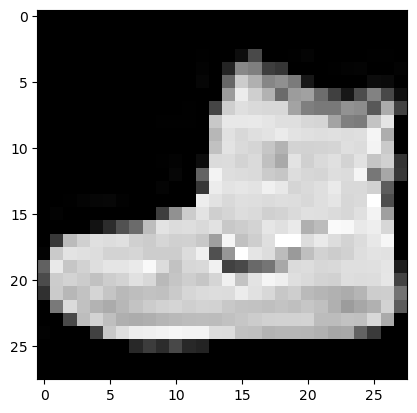

In [4]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro

print(training_labels[0])
print(training_images[0])

Habreis notado que todos los valores numericos están entre 0 y 255. Si estamos entrenando una red neuronal, una buena practica es transformar todos los valores entre 0 y 1, un proceso llamado "normalización" y afortunadamente en Python es fácil normalizar una lista. Lo puedes hacer de esta manera:

In [5]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Ahora vamos a definir el modelo, pero antes vamos a repasar algunos comandos y conceptos muy utiles:
* **Sequential**: Eso define una SECUENCIA de capas en la red neuronal
* **Dense**: Añade una capa de neuronas
* **Flatten**: ¿Recuerdas que las imágenes cómo eran las imagenes cuando las imprimiste para poder verlas? Un cuadrado, Flatten sólo toma ese cuadrado y lo convierte en un vector de una dimensión.

Cada capa de neuronas necesita una función de activación. Normalmente se usa la función relu en las capas intermedias y softmax en la ultima capa
* **Relu** significa que "Si X>0 devuelve X, si no, devuelve 0", así que lo que hace es pasar sólo valores 0 o mayores a la siguiente capa de la red.
* **Softmax** toma un conjunto de valores, y escoge el más grande.

 **Pregunta 1 (3.5 puntos)**. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Una hidden layer de tamaños 128, utilizando unidades sigmoid
Optimizador Adam.
* Durante el entrenamiento, la red tiene que mostrar resultados de loss y accuracy por cada epoch.
* La red debe entrenar durante 10 epochs y batch size de 64.
* La última capa debe de ser una capa softmax.
* Tu red tendría que ser capaz de superar fácilmente 80% de accuracy.

In [6]:
### Tu código para la red neuronal de la pregunta 1 aquí ###

# El control de los SEED de NumPy y Keras mitiga el efecto de la inicialización de parámetros. Esto permite comparar resultados en múltiples ejecuciones.
tf.random.set_seed(42)
np.random.seed(42)

# Definición del modelo conforme a las especificaciones:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Entrenar 10 epochs con batch_size=64.
# Keras muestra loss y accuracy por epoch.
history = model.fit(
    training_images,
    training_labels,
    epochs=10,
    batch_size=64,
    verbose=1
)

/Users/edprata/anaconda3/envs/Python-3-13-2/lib/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8014 - loss: 0.5922
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 860us/step - accuracy: 0.8541 - loss: 0.4106
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step - accuracy: 0.8674 - loss: 0.3727
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8758 - loss: 0.3486
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 891us/step - accuracy: 0.8817 - loss: 0.3305
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step - accuracy: 0.8867 - loss: 0.3158
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 941us/step - accuracy: 0.8906 - loss: 0.3032
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 835us/step - accuracy: 0.8946 - loss: 0.2920
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 845us/step - accuracy: 0.8982 - loss: 0.2820
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 804us/step - accuracy: 0.9011 - loss: 0.2729


Para concluir el entrenamiento de la red neuronal, una buena practica es evaluar el modelo para ver si la precisión de entrenamiento es real

**pregunta 2 (0.5 puntos)**: evalua el modelo con las imagenes y etiquetas test.

In [7]:
### Tu código para la evaluación de la red neuronal de la pregunta 2 aquí ###

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print(f"Test loss: {test_loss:.4f}  -  Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - accuracy: 0.8747 - loss: 0.3486
Test loss: 0.3486  -  Test accuracy: 0.8747


Ahora vamos a explorar el código con una serie de ejercicios para alcanzar un grado de comprensión mayor sobre las redes neuronales y su entrenamiento.

# **Ejercicio 1: Funcionamiento de las predicción de la red neuronal**

Para este primer ejercicio sigue los siguientes pasos: 

* Crea una variable llamada **classifications** para construir un clasificador para las imágenes de prueba, para ello puedes utilizar la función predict sobre el conjunto de test
* Imprime con la función print la primera entrada en las clasificaciones. 

**pregunta 3.1 (0.25 puntos)**, el resultado al imprimirlo es un vector de números, 
* ¿Por qué crees que ocurre esto, y qué representa este vector de números?

**pregunta 3.2 (0.25 puntos)**
* ¿Cúal es la clase de la primera entrada  de la variable **classifications**? La respuesta puede ser un número o su etiqueta/clase equivalente.

In [8]:
### Tu código del clasificador de la pregunta 3 aquí ###

# Generar predicciones para el conjunto de test
classifications = model.predict(test_images, verbose=0)

# Imprimir el vector de probabilidades para la primera imagen de test
print("Predicción (probabilidades) primera imagen:", classifications[0])

# Clase predicted (índice con mayor probabilidad)
predicted_class = np.argmax(classifications[0])
print("Clase predicha para la primera imagen:", predicted_class)

Predicción (probabilidades) primera imagen: [8.2387833e-06 2.1429116e-06 1.7876417e-05 4.0855712e-06 1.6748125e-05 2.9845260e-02 1.3220018e-05 2.6882691e-02 8.9666137e-05 9.4312000e-01]
Clase predicha para la primera imagen: 9


**Tu respuesta a la pregunta 3.1 aquí:**

El vector numérico resultante es la representación unidimensional de los datos correspondientes a la imagen. Esto se debe a que la capa Flatten de la red neuronal transforma los datos en vectores unidimensionales.

**Tu respuesta a la pregunta 3.2 aquí:**

Clase predicha para la primera imagen: 9

# **Ejercicio 2: Impacto variar el número de neuronas en las capas ocultas**

En este ejercicio vamos a experimentar con nuestra red neuronal cambiando el numero de neuronas por 512 y por 1024. Para ello, utiliza la red neuronal de la pregunta 1, y su capa oculta cambia las 128 neuronas:

* **pregunta 4.1 (0.25 puntos)**: 512 neuronas en la capa oculta
* **pregunta 4.2 (0.25 puntos)**:1024 neuronas en la capa oculta

y entrena la red en ambos casos.

**pregunta 4.3 (0.5 puntos)**: ¿Cual es el impacto que tiene la red neuronal?

In [9]:
### Tu código para 512 neuronas aquí ###

# Definición del modelo conforme a las especificaciones (512 neuronas):
model_512 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilación del modelo:
model_512.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenar 10 epochs con batch_size=64:
history_512 = model_512.fit(
    training_images,
    training_labels,
    epochs=10,
    batch_size=64,
    verbose=1
)

# Evaluar el modelo con 512 neuronas:
test_loss_512, test_acc_512 = model_512.evaluate(test_images, test_labels, verbose=1)
print(f"512 neurons -> Test loss: {test_loss_512:.4f}  -  Test accuracy: {test_acc_512:.4f}")

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8132 - loss: 0.5261
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8555 - loss: 0.3995
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8694 - loss: 0.3618
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8787 - loss: 0.3352
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8849 - loss: 0.3140
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8906 - loss: 0.2961
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8959 - loss: 0.2805
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9013 - loss: 0.2665
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9061 - loss: 0.2537
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9099 - loss: 0.2417
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.8801 - loss: 0.3400
512 neurons -> Test loss: 0.3400  -  Test accuracy: 0.8801


In [10]:
### Tu código para 1024 neuronas aquí ###

# Definición del modelo conforme a las especificaciones (1024 neuronas):
model_1024 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1024, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilación del modelo:
model_1024.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenar 10 epochs con batch_size=64:
history_1024 = model_1024.fit(
    training_images,
    training_labels,
    epochs=10,
    batch_size=64,
    verbose=1
)

# Evaluar el modelo con 1024 neuronas:
test_loss_1024, test_acc_1024 = model_1024.evaluate(test_images, test_labels, verbose=1)
print(f"1024 neurons -> Test loss: {test_loss_1024:.4f}  -  Test accuracy: {test_acc_1024:.4f}")

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8145 - loss: 0.5208
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8550 - loss: 0.4011
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8683 - loss: 0.3627
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8773 - loss: 0.3350
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8851 - loss: 0.3122
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8920 - loss: 0.2926
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8975 - loss: 0.2753
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9037 - loss: 0.2596
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9089 - loss: 0.2451
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9137 - loss: 0.2315
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.8826 - loss: 0.3399
1024 neurons -> Test loss: 0.3399  -  Test accuracy: 0.8826


**Tu respuesta a la pregunta 4.3 aquí:**

No hay impacto si se utilizan más neuronas. El resultado es muy similar, con una tasa de pérdida y una precisión prácticamente iguales.

Si ahora entrenais el modelo de esta forma (con 512 y 1024 neuronas en la capa oculta) y volveis a ejecutar el predictor guardado en la variable **classifications**, escribir el código del clasificador del ejercicio 1 de nuevo e imprimid el primer objeto guardado en la variable classifications.

**pregunta 5.1 (0.25 puntos)**: 

* ¿En que clase esta clasificado ahora la primera prenda de vestir de la variable classifications?

**pregunta 5.1 (0.25 puntos)**: 

* ¿Porque crees que ha ocurrido esto?

In [11]:
### Tu código del clasificador de la pregunta 5 aquí ###

# Mapping of Fashion MNIST class indices to names:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Re-ejecutar predictor con el modelo de 512 neuronas
classifications_512 = model_512.predict(test_images, verbose=0)
print("512 - Primer vector de probabilidades:", classifications_512[0])
pred_512 = np.argmax(classifications_512[0])
print("512 - Clase predicha (índice):", pred_512, "-", class_names[pred_512])

# Re-ejecutar predictor con el modelo de 1024 neuronas
classifications_1024 = model_1024.predict(test_images, verbose=0)
print("1024 - Primer vector de probabilidades:", classifications_1024[0])
pred_1024 = np.argmax(classifications_1024[0])
print("1024 - Clase predicha (índice):", pred_1024, "-", class_names[pred_1024])

# Repetir para el modelo original 128 para comparar
classifications_128 = model.predict(test_images, verbose=0)
print("128 - Primer vector de probabilidades:", classifications_128[0])
pred_128 = np.argmax(classifications_128[0])
print("128 - Clase predicha (índice):", pred_128, "-", class_names[pred_128])

512 - Primer vector de probabilidades: [3.6317917e-07 1.3178897e-08 2.9818258e-07 3.6387152e-07 7.9640574e-07 5.7426346e-03 6.1475921e-06 1.3519223e-02 2.1220319e-06 9.8072797e-01]
512 - Clase predicha (índice): 9 - Ankle boot
1024 - Primer vector de probabilidades: [1.2006760e-07 4.0009805e-08 2.4947366e-07 2.7553975e-07 1.4004070e-07 1.7474033e-03 1.0025764e-06 9.1576381e-03 3.9813875e-07 9.8909283e-01]
1024 - Clase predicha (índice): 9 - Ankle boot
128 - Primer vector de probabilidades: [8.2387833e-06 2.1429116e-06 1.7876417e-05 4.0855712e-06 1.6748125e-05 2.9845260e-02 1.3220018e-05 2.6882691e-02 8.9666137e-05 9.4312000e-01]
128 - Clase predicha (índice): 9 - Ankle boot


**Tu respuesta a la pregunta 5.1 aquí:**

La clase es 9.

**Tu respuesta a la pregunta 5.2 aquí:**

En general, la clase puede cambiar entre modelos porque difieren la arquitectura (capacidad), la inicialización de pesos y la convergencia durante entrenamiento; esto produce distintas representaciones internas y, por tanto, distintas predicciones (además de posible overfitting o mayor generalización según el tamaño de la red).

En este caso, se utilizó un control de inicialización de pesos (SEED), y los resultados de accuracy y loss son muy similares. Por ello, también se espera una respuesta final (predicción) similar. Esto es lo que ocurrió en las tres redes probadas.

# **Ejercicio 3: ¿por qué es tan importante la capa Flatten?**

En este ejercicio vamos a ver que ocurre cuando quitamos la capa flatten, para ello, escribe la red neuronal de la pregunta 1 y no pongas la capa Flatten.

**pregunta 6 (0.5 puntos):** ¿puedes explicar porque da el error que da?



In [12]:
### Tu código de la red neuronal sin capa flatten de la pregunta 6 aquí ###

# Intentamos definir la red sin la capa Flatten:
model_no_flatten = tf.keras.Sequential([
    # Sin Flatten: input_shape=(28,28)
    tf.keras.layers.Dense(128, activation='sigmoid', input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilación del modelo sin Flatten:
model_no_flatten.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Mostrar resumen del modelo sin Flatten:
model_no_flatten.summary()

# Intento de entrenamiento, capturamos el error para mostrarlo claramente:
try:
    model_no_flatten.fit(
        training_images,
        training_labels,
        epochs=1,
        batch_size=64,
        verbose=1
    )

except Exception as e:
    print("Error durante el entrenamiento (esperado):")
    print(e)

/Users/edprata/anaconda3/envs/Python-3-13-2/lib/python3.13/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 28, 128)        │         3,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 28, 10)         │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,002 (19.54 KB)

 Trainable params: 5,002 (19.54 KB)

 Non-trainable params: 0 (0.00 B)

Error durante el entrenamiento (esperado):
Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(None,), output.shape=(None, 28, 10)


**Tu respuesta a la pregunta 6 aquí:**

Al quitar la capa Flatten la entrada a la primera Dense tiene shape (batch, 28, 28). Keras aplica Dense a la última dimensión, por eso la salida intermedia tiene shape (batch, 28, 128) y la salida final (batch, 28, 10). Pero las etiquetas son vectores 1D (shape (batch,)), por lo que la salida del modelo y las etiquetas no son compatibles y se produce un ValueError (por ejemplo: "Shapes (None, 28, 10) and (None,) are incompatible").

Dense está pensado para operar sobre vectores (última dimensión), no para convertir un tensor 2D en un vector por sí mismo. Flatten convierte la imagen 28x28 en un vector de 784 características por muestra, lo que hace compatibles las dimensiones.

Corrección: Usar la capa Flatten es lo más recomendable, pero puedes remodelar los datos y usar input_shape=(784,) en Dense. Demostración de cómo proceder.

In [13]:
# Remodelar las imágenes a vectores 784 y usar Dense con input_shape=(784,)
X_train_flat = training_images.reshape(-1, 28*28)
X_test_flat  = test_images.reshape(-1, 28*28)

model_flattened_input = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='sigmoid', input_shape=(28*28,)),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_flattened_input.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history2 = model_flattened_input.fit(X_train_flat, training_labels, epochs=10, batch_size=64, verbose=1)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 795us/step - accuracy: 0.8000 - loss: 0.5957
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step - accuracy: 0.8528 - loss: 0.4125
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step - accuracy: 0.8660 - loss: 0.3744
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 827us/step - accuracy: 0.8741 - loss: 0.3498
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8807 - loss: 0.3310
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 844us/step - accuracy: 0.8863 - loss: 0.3158
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step - accuracy: 0.8908 - loss: 0.3029
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 781us/step - accuracy: 0.8953 - loss: 0.2916
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - accuracy: 0.8982 - loss: 0.2814
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 781us/step - accuracy: 0.9013 - loss: 0.2721


# **Ejercicio 4: Número de neuronas de la capa de salida**
Considerad la capa final, la de salida de la red neuronal de la pregunta 1.

**pregunta 7.1 (0.25 puntos)**: ¿Por qué son 10 las neuronas de la última capa?

**pregunta 7.2 (0.25 puntos)**: ¿Qué pasaría si tuvieras una cantidad diferente a 10? 

Por ejemplo, intenta entrenar la red con 5, para ello utiliza la red neuronal de la pregunta 1 y cambia a 5 el número de neuronas en la última capa.

In [14]:
### Tu código de la red neuronal con 5 neuronas en la capa de salida de la pregunta 7 aquí ###

# Definir el modelo con 5 neuronas en la salida
model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model_5.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Intentar entrenar con las etiquetas originales (0-9)
# Esto normalmente fallará, ya que las etiquetas van de 0 a 9, no de 0 a 4:
try:
    history_5 = model_5.fit(training_images, training_labels, epochs=10, batch_size=64, verbose=1)
    test_loss_5, test_acc_5 = model_5.evaluate(test_images, test_labels, verbose=1)
    print(f"5 neurons -> Test loss: {test_loss_5:.4f}  -  Test accuracy: {test_acc_5:.4f}")

except Exception as e:
    print("Error al entrenar con salida de 5 neuronas usando labels 0-9 (esperado):")
    print(e)

Epoch 1/10
Error al entrenar con salida de 5 neuronas usando labels 0-9 (esperado):
Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/Users/edprata/anaconda3/envs/Python-3-13-2/lib/python3.13/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/Users/edprata/anaconda3/envs/Python-3-13-2/lib/python3.13/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/Users/edprata/anaconda3/envs/Python-3-13-2/lib/python3.13/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/Users/edprata/anaconda3/envs/Python-3-13-2/lib/python3.13/site-packages/tornado/platform/asyncio.py", line 211, in start

  File "/Users/edprata/anaconda3/envs/Python-3-13-2/lib/python3.13/asyncio/base_event

2025-12-15 11:14:55.504465: W tensorflow/core/framework/op_kernel.cc:1855] OP_REQUIRES failed at sparse_xent_op.cc:103 : INVALID_ARGUMENT: Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 0 9 3 3 4 6 9 6 1 5 9 5 0 9 4 9 9 5 1 1 1 1 5 1 6 9 7 9 9 0 2 2 0 7 5 3 6 9 5 8 4 6 5 3 3 6 2 7 4 3 1 0 8 8 5 3 8 2 2 8 8 4 3 5
2025-12-15 11:14:55.504489: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: INVALID_ARGUMENT: Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 0 9 3 3 4 6 9 6 1 5 9 5 0 9 4 9 9 5 1 1 1 1 5 1 6 9 7 9 9 0 2 2 0 7 5 3 6 9 5 8 4 6 5 3 3 6 2 7 4 3 1 0 8 8 5 3 8 2 2 8 8 4 3 5
	 [[{{function_node __inference_one_step_on_data_169135}}{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]]


**Tu respuestas a la pregunta 7.1 aquí:**

Se necesitan diez neuronas en la última capa porque hay diez etiquetas posibles. Usar un número diferente de etiquetas y neuronas en la salida provocará un error. La salida debe producir una probabilidad por clase.

**Tu respuestas a la pregunta 7.2 aquí:**

Si cambia el número de neuronas de salida a un valor distinto de 10, que es el valor máximo posible según las etiquetas que tenemos, obtendrá un error (etiquetas fuera de rango).

# Ejercicio 5: Aumento de epoch y su efecto en la red neuronal
En este ejercicio vamos a ver el impacto de aumentar los epoch en el entrenamiento. Usando la red neuronal de la pregunta 1:

**pregunta 8.1 (0.20 puntos)**
* Intentad 15 epoch para su entrenamiento, probablemente obtendras un modelo con una pérdida mucho mejor que el que tiene 5.

**pregunta 8.2 (0.20 puntos)**
* Intenta ahora con 30 epoch para su entrenamiento, podrás ver que el valor de la pérdida deja de disminuir, y a veces aumenta.

**pregunta 8.3 (0.60 puntos)**
* ¿Porque que piensas que ocurre esto? Explica tu respuesta y da el nombre de este efecto si lo conoces.

In [15]:
### Tu código para 15 epoch aquí ###

# Definición del modelo conforme a las especificaciones (15 epochs):
model_15_epochs = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilación del modelo:
model_15_epochs.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenar 15 epochs con batch_size=64:
history_15_epochs = model_15_epochs.fit(
    training_images,
    training_labels,
    epochs=15,
    batch_size=64,
    verbose=1
)

# Evaluar el modelo con 15 epochs:
test_loss_15_epochs, test_acc_15_epochs = model_15_epochs.evaluate(test_images, test_labels, verbose=1)
print(f"15 ephocs -> Test loss: {test_loss_15_epochs:.4f}  -  Test accuracy: {test_acc_15_epochs:.4f}")

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 778us/step - accuracy: 0.8010 - loss: 0.5953
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - accuracy: 0.8545 - loss: 0.4110
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 768us/step - accuracy: 0.8673 - loss: 0.3724
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - accuracy: 0.8757 - loss: 0.3480
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 762us/step - accuracy: 0.8813 - loss: 0.3295
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step - accuracy: 0.8862 - loss: 0.3144
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step - accuracy: 0.8911 - loss: 0.3015
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step - accuracy: 0.8955 - loss: 0.2901
Epoch 9/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 779us/step - accuracy: 0.8988 - loss: 0.2798
Epoch 10/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step - accuracy: 0.9014 - loss: 0.2704
Epoch 11/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - accuracy: 0.9043 - loss: 0.2618
Epoch 12/15
938/938 ━━━━━━━━━━

In [16]:
### Tu código para 30 epoch aquí ###

# Definición del modelo conforme a las especificaciones (30 epochs):
model_30_epochs = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilación del modelo:
model_30_epochs.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenar 30 epochs con batch_size=64:
history_30_epochs = model_30_epochs.fit(
    training_images,
    training_labels,
    epochs=30,
    batch_size=64,
    verbose=1
)

# Evaluar el modelo con 30 epochs:
test_loss_30_epochs, test_acc_30_epochs = model_30_epochs.evaluate(test_images, test_labels, verbose=1)
print(f"30 epochs -> Test loss: {test_loss_30_epochs:.4f}  -  Test accuracy: {test_acc_30_epochs:.4f}")

Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 759us/step - accuracy: 0.8045 - loss: 0.5880
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - accuracy: 0.8531 - loss: 0.4111
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 757us/step - accuracy: 0.8665 - loss: 0.3737
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 911us/step - accuracy: 0.8747 - loss: 0.3495
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 753us/step - accuracy: 0.8815 - loss: 0.3310
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 876us/step - accuracy: 0.8868 - loss: 0.3157
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 760us/step - accuracy: 0.8916 - loss: 0.3027
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 757us/step - accuracy: 0.8950 - loss: 0.2912
Epoch 9/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step - accuracy: 0.8986 - loss: 0.2807
Epoch 10/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - accuracy: 0.9020 - loss: 0.2711
Epoch 11/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 773us/step - accuracy: 0.9052 - loss: 0.2623
Epoch 12/30
938/938 ━━━━━━━━━━

**Tu respuesta a la pregunta 8.3 aquí:**

La razón que explica la situación donde con 15 epoch de entrenamiento, obtengo un modelo con una pérdida mucho mejor que el que tiene 10, pero si hago con 30 epoch para el entrenamiento, puedo ver que el valor de la pérdida deja de disminuir, y a veces aumenta, ocurre por lo efecto de overfitting.

Se trata de un sobreajuste del modelo que sigue reduciendo la pérdida en entrenamiento pero empieza a memorizar ruido y patrones específicos del conjunto de entrenamiento, por lo que la pérdida/precisión en validación deja de mejorar e incluso empeora.

# Ejercicio 6: Early stop
En el ejercicio anterior, cuando entrenabas con epoch extras, tenías un problema en el que tu pérdida podía cambiar. Puede que te haya llevado un poco de tiempo esperar a que el entrenamiento lo hiciera,  y puede que hayas pensado "¿no estaría bien si pudiera parar el entrenamiento cuando alcance un valor deseado?", es decir, una precisión del 85% podría ser suficiente para ti, y si alcanzas eso después de 3 epoch, ¿por qué sentarte a esperar a que termine muchas más épocas? Como cualquier otro programa existen formas de parar la ejecución

A partir del ejemplo de código que

 se da, hacer una nueva función que tenga en cuenta la perdida (loss) y que pueda parar el código para
evitar que ocurra el efeto secundario que vimos en el ejercicio 5.

In [17]:
### Ejemplo de código

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')> 0.85):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True

**Pregunta 9 (2 puntos)**: Completa el siguiente código con una clase callback que una vez alcanzado el 40% de perdida detenga el entrenamiento.

In [18]:
import tensorflow as tf
print(tf.__version__)

### Tu código de la función callback para parar el entrenamiento de la red neuronal al 40% de loss aqui: ###
class myCallback2(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss') < 0.41):
              print("\nAlcanzado el 40% de loss, se cancela el entrenamiento!!")
              self.model.stop_training = True

callbacks = myCallback2()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(
    training_images,
    training_labels,
    epochs=50,
    callbacks=[callbacks],
    verbose=1
)

2.20.0
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8315 - loss: 0.4756
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8654 - loss: 0.3682
Alcanzado el 40% de loss, se cancela el entrenamiento!!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8694 - loss: 0.3568
